<div align="right"><h1>We Rate Dogs Data Wrangling Project</h1></div>

<div align="right"><i>by Sarah Aranda</i></div>

<img src="https://images.pexels.com/photos/8700/wall-animal-dog-pet.jpg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"></img>

<div align="center"><h1>Preparation</h1></div>

In [1]:
# Import libraries to be used
import numpy as np
import pandas as pd
import tweepy
import requests
import json
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

<div align="center"><h1>Gather</h1></div>

<h3>Twitter Archive (Dataset 01 of 03)</h3>

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

<h3>Predictions (Dataset 02 of 03)</h3>

In [3]:
# This dataset will be downloaded programmatically using requests library.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# HTTP status code (200) above indicates request was a success
# Check content of response variable
# response.content

In [5]:
# Save file to computer
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
predictions = pd.read_csv('image_predictions.tsv', sep='\t')

<h3>Twitter API (Dataset 03 of 03)</h3>

In [7]:
# Create API object to gather Twitter data

#import tweepy

#consumer_key = '...'
#consumer_secret = '...'
#access_token = '...'
#access_secret = '...'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

In [8]:
# Create list of tweet IDs from first dataset
tweet_ids = twitter_archive['tweet_id'].tolist()

In [9]:
# from tweepy import OAuthHandler
# from timeit import default_timer as timer

# count = 0
# fails_dict = {}
# start = timer()

# #ok i put this in
# tweet_test = []

# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
            
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [10]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

with open('tweet_json.txt', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()       
    
df_tweet_info = pd.DataFrame.from_dict(data)

<div align="center"><h1>Assess</h1></div>

<h3>Twitter Archive (Dataset 01 of 03)</h3>

In [11]:
# Get idea of dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Look at random sample
twitter_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2008,672256522047614977,NaN,NaN,2015-12-03 03:30:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Mighty rare dogs here. Long smooth necks. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672256522...,8,10,None,None,None,None,None
929,754482103782404096,NaN,NaN,2016-07-17 01:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He's currently plotting his reve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754482103...,10,10,Milo,None,None,None,None
339,832273440279240704,NaN,NaN,2017-02-16 17:00:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440...,14,10,Smiley,doggo,None,None,None
1910,674416750885273600,NaN,NaN,2015-12-09 02:34:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jonah. He's a Stinted Fisher Price. En...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674416750...,10,10,Jonah,None,None,None,None
2040,671544874165002241,NaN,NaN,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671544874...,6,10,None,None,None,None,None
1253,710833117892898816,NaN,NaN,2016-03-18 14:19:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sora. She's an Egyptian Pumpernic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710833117...,12,10,Sora,None,None,None,None
1541,689623661272240129,NaN,NaN,2016-01-20 01:41:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's terrified of the stuffed b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,None,None,pupper,None
438,820013781606658049,NaN,NaN,2017-01-13 21:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo
669,790227638568808452,NaN,NaN,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leela. She's a Fetty Wo...,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None


In [13]:
# Is this meaningful info?
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
# Check to see duplicate tweet IDs
twitter_archive['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [15]:
# Investigate 'name' column through random sample (which I run a few times)
twitter_archive['name'].sample(10)

74      Terrance
370         Mutt
1730       Bruce
2354           a
926        Rubio
609       Cassie
112         None
460         Dido
1638        None
2208        Maks
Name: name, dtype: object

In [16]:
# Further investigate 'name' column
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
Buddy         7
an            7
Bailey        7
Toby          7
Bella         6
Dave          6
Milo          6
Jax           6
Scout         6
Jack          6
Stanley       6
Leo           6
Rusty         6
Oscar         6
Koda          6
Phil          5
           ... 
Yoda          1
Gustav        1
Rizzo         1
Marty         1
Mimosa        1
Olaf          1
Kramer        1
Bluebert      1
Dot           1
Scott         1
Jay           1
Rascal        1
Jarvis        1
Luther        1
Gunner        1
General       1
Koko          1
Winifred      1
Spencer       1
Amber         1
Ron           1
Emanuel       1
Kevon         1
Holly         1
Noah          1
Goose         1
Edgar         1
Ashleigh      1
Pluto         1
Bones         1
Name: name, Length: 957,

In [17]:
# Check for all lowercase values in 'name' column
for c in twitter_archive.name:
    if c.islower():
         print(c)

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


In [18]:
# Check for all uppercase values in 'name' column
for c in twitter_archive.name:
    if c.isupper():
         print(c)

O
JD


In [19]:
# Check for duplicates in 'tweet_id' column
twitter_archive['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [20]:
# Check for duplicates in 'text' column
twitter_archive['text'].duplicated().value_counts()

False    2356
Name: text, dtype: int64

In [21]:
# Check values for 'rating_denomintor' column
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
# Check values for 'rating_numerator' column
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [25]:
# Observe number of non-null values for 'retweeted_status_id'
twitter_archive.loc[twitter_archive['retweeted_status_id'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 17 columns):
tweet_id                      181 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     181 non-null object
source                        181 non-null object
text                          181 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 180 non-null object
rating_numerator              181 non-null int64
rating_denominator            181 non-null int64
name                          181 non-null object
doggo                         181 non-null object
floofer                       181 non-null object
pupper                        181 non-null object
puppo                         181 non-null object
dtypes: float64(4), int64(3), object(10)
memor

In [26]:
# Observe number of non-null values for 'retweeted_status_user_id'
twitter_archive.loc[twitter_archive['retweeted_status_user_id'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 17 columns):
tweet_id                      181 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     181 non-null object
source                        181 non-null object
text                          181 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 180 non-null object
rating_numerator              181 non-null int64
rating_denominator            181 non-null int64
name                          181 non-null object
doggo                         181 non-null object
floofer                       181 non-null object
pupper                        181 non-null object
puppo                         181 non-null object
dtypes: float64(4), int64(3), object(10)
memor

<h3>Predictions (Dataset 02 of 03)</h3>

In [27]:
# Get idea of dataset
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
# Look at 30 samples
predictions.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
622,680497766108381184,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,1,Chihuahua,0.538354,True,muzzle,0.084289,False,ski_mask,0.076690,False
913,700864154249383937,https://pbs.twimg.com/media/Cbn4OqKWwAADGWt.jpg,1,kuvasz,0.805857,True,Great_Pyrenees,0.187272,True,Samoyed,0.003491,True
1311,754449512966619136,https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg,1,beagle,0.858513,True,basset,0.076012,True,English_foxhound,0.016246,True
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True


In [29]:
# Check for duplicates in 'jpg_url' column
predictions['jpg_url'].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [30]:
# Check for duplicates in 'tweet_id' column
predictions['tweet_id'].duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [31]:
# Check minimum and maximum of 'pf_conf', 'p2_conf', and 'p3_conf'
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
predictions['jpg_url'].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

<h3>Twitter API (Dataset 03 of 03)</h3>

In [33]:
# Get idea of dataset
df_tweet_info.sample(10)

,favorite_count,id,retweet_count
1242,2227,710283270106132480,547
1407,1602,697995514407682048,354
2067,2001,670804601705242624,983
1888,6371,674468880899788800,2142
89,27359,874680097055178752,4568
1394,2719,699036661657767936,1271
359,38616,828708714936930305,12135
1687,1848,680889648562991104,391
1885,1720,674638615994089473,604
2172,715,668960084974809088,245


In [34]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 3 columns):
favorite_count    2338 non-null int64
id                2338 non-null int64
retweet_count     2338 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [35]:
df_tweet_info.describe()

,favorite_count,id,retweet_count
count,2338.000000,2.338000e+03,2338.000000
mean,7952.514115,7.422202e+17,2925.777160
std,12325.166559,6.833829e+16,4932.141605
min,0.000000,6.660209e+17,0.000000
25%,1371.500000,6.783361e+17,587.250000
50%,3458.500000,7.186224e+17,1366.500000
75%,9733.000000,7.986971e+17,3408.750000
max,164186.000000,8.924206e+17,83581.000000


<div align="center"><h4>Assessment Conclusions</h4></div><br>

After some assessments of the three datasets, I've noted the following which will be cleaned in the next stage. 'T' indicates a tidiness issue while 'Q' indicates a quality issue.<br><br>


<ol>
<b>twitter_archive dataset</b>
<li>'name' values that are all lowercase are invalid entries (i.e. not dog names) <font color='orange'><b>Q</b></font></li>
<li>there are retweets which is signified by values in 'retweeted_status_id' and 'reteweeted_status_user_id' <font color='orange'><b>Q</b></font></li>
<li>columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' are not needed <font color='orange'><b>Q</b></font></li>
<li>each dog stage exists in its own column <font color='orange'><b>Q</b></font></li>
<li>rating is represented in two columns--'rating_numerator' and 'rating_denominator' <font color='blue'><b>T</b></font></li>
<li>'timestamp' column values are strings <font color='orange'><b>Q</b></font></li>
<li>'source' content is not useful as they are dead links <font color='orange'><b>Q</b></font></li><br>


<b>predictions dataset</b>
<li>values in columns 'p1', 'p2', and 'p3' don't have consistent format <font color='orange'><b>Q</b></font></li>
<li>there are duplicates in the 'jpg_url' column <font color='blue'><b>T</b></font></li><br>

<b>all datasets</b>
<li>the column label for Tweet IDs should be the same across the three separate datasets <font color='orange'><b>Q</b></font></li>
<li>There are three different datasets.  Some of the information can be contained in a single data frame. <font color='blue'><b>T</b></font></li>
</ol>

<div align="center"><h1>Clean</h1></div>

In [36]:
# Makecopy of datasets
df1 = twitter_archive.copy()
df2 = predictions.copy()
df3 = df_tweet_info.copy()

<br><h5>Define 01 of 11</h5>

<b>Assessment</b>: In df1, the 'name' values that are all lowercase are invalid entries (i.e. not dog names).<br><b>Clean</b>: Remove lowercase values in 'name' column.

<h5>Code 01 of 11</h5>

In [37]:
notNames = []

for c in df1.name:
    if c.islower()and c not in notNames:
        notNames.append(c)

print(notNames)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [38]:
df1.name.replace(notNames, 'None', inplace = True)

<h5>Test 01 of 11</h5>

In [39]:
# Nothing prints when this code is run. So the lowercase entries are cleared.
for c in df1.name:
    if c.islower():
         print(c)

In [40]:
# Sample from edited 'name' column and run a few times
df1['name'].sample(10)

787     Sprinkles
1392         Eazy
1554         None
700        Mattie
1074        Simba
1076        Benji
1484        Bodie
2289     Clarence
71         Snoopy
319           Leo
Name: name, dtype: object

<br><h5>Define 02 of 11</h5>

<b>Assessment</b>: In df1, there are retweets which is signified by values in 'retweeted_status_id' and 'reteweeted_status_user_id'.
<br><b>Clean</b>: If there is a non-null value in 'retweeted_status_id' or 'reteweeted_status_user_id', drop the row.

<h5>Code 02 of 11</h5>

In [41]:
# Drop retweeted rows
df1 = df1.loc[df1['retweeted_status_id'].isnull() | 
              df1['retweeted_status_user_id'].isnull() | 
              df1['retweeted_status_timestamp'].isnull()]

<h5>Test 02 of 11</h5>

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

<br><h5>Define 03 of 11</h5>

<b>Assessment</b>: In df1, columns 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' are not needed.
<br><b>Clean</b>: Drop 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' columns. (To be done after removing retweeted rows).

<h5>Code 03 of 11</h5>

In [43]:
df1 = df1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

<h5>Test 03 of 11</h5>

In [44]:
list(df1)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

<br><h5>Define 04 of 11</h5>

<b>Assessment</b>: In df1, each dog stage exists in its own column.
<br><b>Clean</b>: Create single column for all dog stages.

<h5>Code 04 of 11</h5>

In [45]:
# Replace "None" with NaN in order to combine values
df1.doggo.replace('None', np.nan, inplace= True)
df1.floofer.replace('None', np.nan, inplace= True)
df1.pupper.replace('None', np.nan, inplace= True)
df1.puppo.replace('None', np.nan, inplace= True)

# Create single column for all dog stages
df1['stage'] = df1[['doggo','floofer','pupper','puppo']].apply(lambda x: None if x.isnull().all() else ', '.join(x.dropna()), axis=1)

# Resource 01:
# https://stackoverflow.com/questions/45976585/combine-pandas-string-columns-with-missing-values

# Resource 02:
# https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe


In [46]:
# Check work
df1['stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

In [47]:
# Drop separate stages columns
df1 = df1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

<h5>Test 04 of 11</h5>

In [48]:
df1['stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

In [49]:
df1.stage.isnull().value_counts()

True     1831
False     344
Name: stage, dtype: int64

In [50]:
list(df1)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

<br><h5>Define 05 of 11</h5>

<b>Assessment</b>: In df1, rating is represened in two columns--'rating_numerator' and 'rating_denominator'.
<br><b>Clean</b>: Create a single column to represent rating.  Label it 'rating_given' which calculates the rating with the given numerators and denominators.

<br><h5>Code 05 of 11</h5>

In [51]:
df1['rating_given'] = df1['rating_numerator'] / df1['rating_denominator']
df1.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

<h5>Test 05 of 11</h5>

In [52]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating_given
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,1.2


<br><h5>Define 06 of 11</h5>

<b>Assessment</b>: In df1, 'timestamp' column values are strings.
<br><b>Clean</b>: Change value of timestamp to datetime.

<h5>Code 06 of 11</h5>

In [53]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'], infer_datetime_format=True)

<h5>Test 06 of 11</h5>

In [54]:
df1['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     2175 non-null object
stage                    344 non-null object
rating_given             2175 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 186.9+ KB


<br><h5>Define 07 of 11</h5>

<b>Assessment</b>: In df1, 'source' content is not useful since they are dead links.
<br><b>Clean</b>: Change content to one of four values.

<br><h5>Code 07 of 11</h5>

In [56]:
df1['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                      'Twitter for iPhone',inplace=True)

df1['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                      'Vine - Make a Scene',inplace=True)

df1['source'].replace('http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                      'Twitter Web Client',inplace=True)

df1['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a> ',
                      'TweetDeck',inplace=True)

<br><h5>Test 07 of 11</h5>

In [57]:
df1['source'].value_counts()

Twitter for iPhone                                                                     2042
Vine - Make a Scene                                                                      91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

<br><h5>Define 08 of 11</h5>

<b>Assessment</b>: In df2, values in columns 'p1', 'p2', and 'p3' don't have consistent format.
<br><b>Clean</b>: Change all 'p1', 'p2', and 'p3' values to lowercase.

<h5>Code 08 of 11</h5>

In [58]:
df2['p1'] = df2['p1'].str.lower()
df2['p2'] = df2['p2'].str.lower()
df2['p3'] = df2['p3'].str.lower()

<h5>Test 08 of 11</h5>

In [59]:
df2.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
741,687317306314240000,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,1,shih-tzu,0.747208,True,maltese_dog,0.091025,True,lhasa,0.035788,True
458,674788554665512960,https://pbs.twimg.com/media/CV1Um8vWIAAmhQn.jpg,1,miniature_poodle,0.349561,True,toy_poodle,0.154711,True,maltese_dog,0.134229,True
772,689557536375177216,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,1,eskimo_dog,0.169482,True,siberian_husky,0.161655,True,dingo,0.154414,False
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,german_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,pembroke,0.931120,True,cardigan,0.068698,True,basenji,0.000082,True
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,chihuahua,0.412362,True,beagle,0.068066,True,borzoi,0.045071,True
364,672884426393653248,https://pbs.twimg.com/media/CVaQ0M4UsAAki3t.jpg,1,tusker,0.122410,False,warthog,0.119870,False,water_buffalo,0.105856,False
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1786,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,labrador_retriever,0.315163,True,golden_retriever,0.153210,True,pekinese,0.132791,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False


In [60]:
# checking programatically
df2.p1.str.lower().count()

2075

In [61]:
df2.p2.str.lower().count()

2075

In [62]:
df2.p3.str.lower().count()

2075

<br><h5>Define 09 of 11</h5>

<b>Assessment</b>: In df2, there are duplicates in the 'jpg_url' column.
<br><b>Clean</b>: Drop duplicates in 'jpg_url' column.

<h5>Code 09 of 11</h5>

In [63]:
df2 = df2.drop_duplicates(subset=['jpg_url'], keep='first')

<h5>Test 09 of 11</h5>

In [64]:
df2['jpg_url'].duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

<br><h5>Define 10 of 11</h5>

<b>Assessment</b>: The column label for Tweet IDs should be the same across the three separate datasets.<br><b>Clean</b>: Change the column label from 'id' to 'tweet_id' in the Twitter API dataset.

<br><h5>Code 10 of 11</h5>

In [65]:
df3.rename(columns={'id': 'tweet_id'}, inplace=True)

<br><h5>Test 10 of 11</h5>

In [66]:
list(df3)

['favorite_count', 'tweet_id', 'retweet_count']

<br><h5>Define 11 of 11</h5>

<b>Assessment</b>: There are three different datasets.  Some of the information can be contained in a single data frame.
<br><b>Clean</b>: Merge the three datasets by tweet ID into a single data frame.

<h5>Code 11 of 11</h5>

In [67]:
df4 = pd.merge(df1,
              df2,
              on='tweet_id')

df4 = pd.merge(df4,
              df3,
              on='tweet_id')

<h5>Test 11 of 11</h5>

In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 23 columns):
tweet_id                 1990 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1990 non-null datetime64[ns]
source                   1990 non-null object
text                     1990 non-null object
expanded_urls            1990 non-null object
name                     1990 non-null object
stage                    306 non-null object
rating_given             1990 non-null float64
jpg_url                  1990 non-null object
img_num                  1990 non-null int64
p1                       1990 non-null object
p1_conf                  1990 non-null float64
p1_dog                   1990 non-null bool
p2                       1990 non-null object
p2_conf                  1990 non-null float64
p2_dog                   1990 non-null bool
p3                       1990 non-null object
p3_conf          

<h4>Store</h4>

In [69]:
df4.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

df4.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating_given,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,1.3,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38006,8312
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,1.3,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,32630,6140
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,1.2,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24554,4065
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,1.3,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,41360,8456
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,1.2,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,39528,9155


<div align="center"><h1>Analyze & Visualize</h1></div>

In [70]:
df4['name'].describe()

count     1990
unique     914
top       None
freq       644
Name: name, dtype: object

Let's see which dog names are the most popular.

In [71]:
# Create a data frame with only dogs
dogs_only = df4[df4.p1_dog == True]

In [72]:
dogs_only['name'].value_counts()

None         433
Cooper        10
Charlie        9
Oliver         9
Tucker         8
Lucy           8
Penny          7
Sadie          7
Daisy          7
Winston        6
Koda           6
Jax            6
Rusty          5
Leo            5
Toby           5
Bella          5
Stanley        5
Bo             5
Finn           4
Scooter        4
Cassie         4
Oscar          4
George         4
Reggie         4
Scout          4
Brody          4
Gus            4
Dave           4
Dexter         4
Larry          4
            ... 
Coops          1
Keet           1
Kloey          1
Shnuggles      1
O              1
Ralph          1
Spencer        1
Zeus           1
Major          1
Reagan         1
Divine         1
Meyer          1
Emma           1
Eriq           1
Kevin          1
Willie         1
Barclay        1
Stormy         1
Ron            1
Mingus         1
Sampson        1
Eevee          1
Jimbo          1
Grizz          1
Bert           1
Trigger        1
Flurpson       1
Mattie        

We can see the the top four names are Cooper, Oliver, Charlie, Tucker, and Lucy.

In [73]:
# Group by dog stage
stage_groups = df4.groupby("stage")
# Apply mean function to weight column
stage_groups['rating_given'].mean()

stage
doggo             1.188889
doggo, floofer    1.100000
doggo, pupper     1.100000
doggo, puppo      1.300000
floofer           1.200000
pupper            1.071429
puppo             1.200000
Name: rating_given, dtype: float64

The dog stages with the highest mean ratings are floofer and puppo.

Let's get an idea of the favorite count, retweet count, and rating.

In [74]:
df4['favorite_count'].describe()

count      1990.000000
mean       8718.452261
std       12795.673121
min          78.000000
25%        1868.250000
50%        3941.500000
75%       10866.250000
max      164186.000000
Name: favorite_count, dtype: float64

In [75]:
df4['retweet_count'].describe()

count     1990.000000
mean      2647.391457
std       4723.929240
min         12.000000
25%        591.000000
50%       1271.500000
75%       3026.000000
max      83581.000000
Name: retweet_count, dtype: float64

In [76]:
df4['rating_given'].describe()

count    1990.000000
mean        1.169338
std         4.071156
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_given, dtype: float64

Let's see which dogs are the most popular by comparing the mean retweet counts, mean favorite counts, and ratings.

In [77]:
top_rt = dogs_only.groupby('p1')['retweet_count'].mean().sort_values(ascending=False).head()
print (top_rt)

p1
standard_poodle     6283.571429
english_springer    5656.111111
afghan_hound        5633.000000
eskimo_dog          5179.722222
saluki              4839.500000
Name: retweet_count, dtype: float64


In [78]:
top_f = dogs_only.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head()
print (top_f)

p1
saluki                     23200.750000
french_bulldog             18306.440000
afghan_hound               16540.333333
black-and-tan_coonhound    16356.000000
flat-coated_retriever      16149.625000
Name: favorite_count, dtype: float64


In [79]:
top_r = dogs_only.groupby('p1')['rating_given'].mean().sort_values(ascending=False).head()
print (top_r)

p1
clumber            2.700000
pomeranian         1.289189
saluki             1.250000
briard             1.233333
tibetan_mastiff    1.225000
Name: rating_given, dtype: float64


We can see some overlap with the dog breeds between these top groupings.  The saluki breed is the only one that appears in all three.

Since we have the information for dog breeds and stages, I'd like to see what combinations of breed and stages do people like.  I'll filter the data frame to see which dog breeds we have the highest counts for.  I'll select the top three to compare: golden retriever, labrador retriever and pembroke and compare the means of their favorite counts.

In [80]:
# Making new dataframe made up of dogs with given stage
dogs_w_stage = dogs_only[dogs_only.stage != 'None']

In [81]:
# Look at most common dogs with given stage
dogs_w_stage['p1'].value_counts()

golden_retriever               139
labrador_retriever              95
pembroke                        88
chihuahua                       79
pug                             54
chow                            41
samoyed                         39
toy_poodle                      38
pomeranian                      37
malamute                        29
cocker_spaniel                  27
french_bulldog                  25
chesapeake_bay_retriever        23
miniature_pinscher              22
german_shepherd                 20
siberian_husky                  20
staffordshire_bullterrier       19
eskimo_dog                      18
maltese_dog                     18
shetland_sheepdog               18
rottweiler                      17
cardigan                        17
beagle                          17
shih-tzu                        17
lakeland_terrier                16
italian_greyhound               16
kuvasz                          16
great_pyrenees                  14
west_highland_white_

In [82]:
mostCommon = dogs_w_stage.loc[(dogs_only['p1'] == 'golden_retriever') | 
                                  (dogs_only['p1'] == 'labrador_retriever') | 
                                  (dogs_only['p1'] == 'pembroke')]

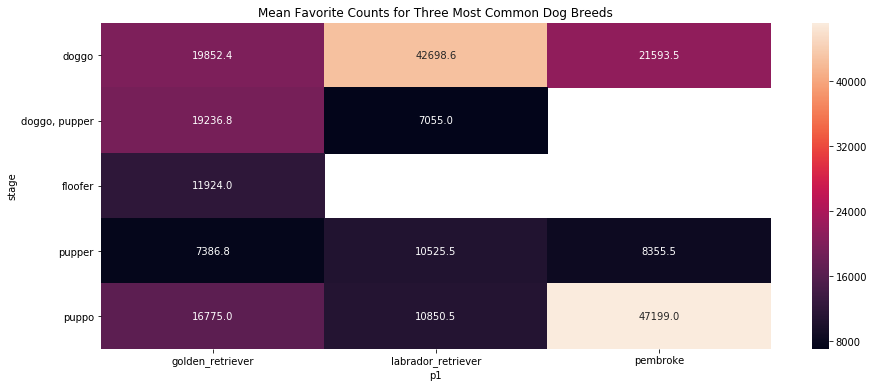

In [83]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title('Mean Favorite Counts for Three Most Common Dog Breeds')
mc_dog_w_stage = mostCommon.pivot_table(index='stage', columns='p1', values='favorite_count', aggfunc=np.mean)
sns.heatmap(mc_dog_w_stage, annot=True, fmt=".1f")
plt.show()

Although we are lacking some entries for Labrador Retriever and Pembroke floofers, in comparing the information we have between the other ten dog types, we see that young Pembroke puppies (puppos) are the most favorited followed by mature (doggo) Labrador Retrievers.

Since we have the timestamps for these tweets, I want to look at whether there is a certain day of the month that corresponds to higher retweet activity.  For the visualization, I'll choose to compare mean retweet counts to months and weekdays.

In [84]:
df5 = df4.copy()

df5['year'] = pd.DatetimeIndex(df5['timestamp']).year
df5['month'] = pd.DatetimeIndex(df5['timestamp']).month
df5['day'] = pd.DatetimeIndex(df5['timestamp']).day
df5['weekday'] = pd.DatetimeIndex(df5['timestamp']).weekday
df5['hour'] = pd.DatetimeIndex(df5['timestamp']).hour

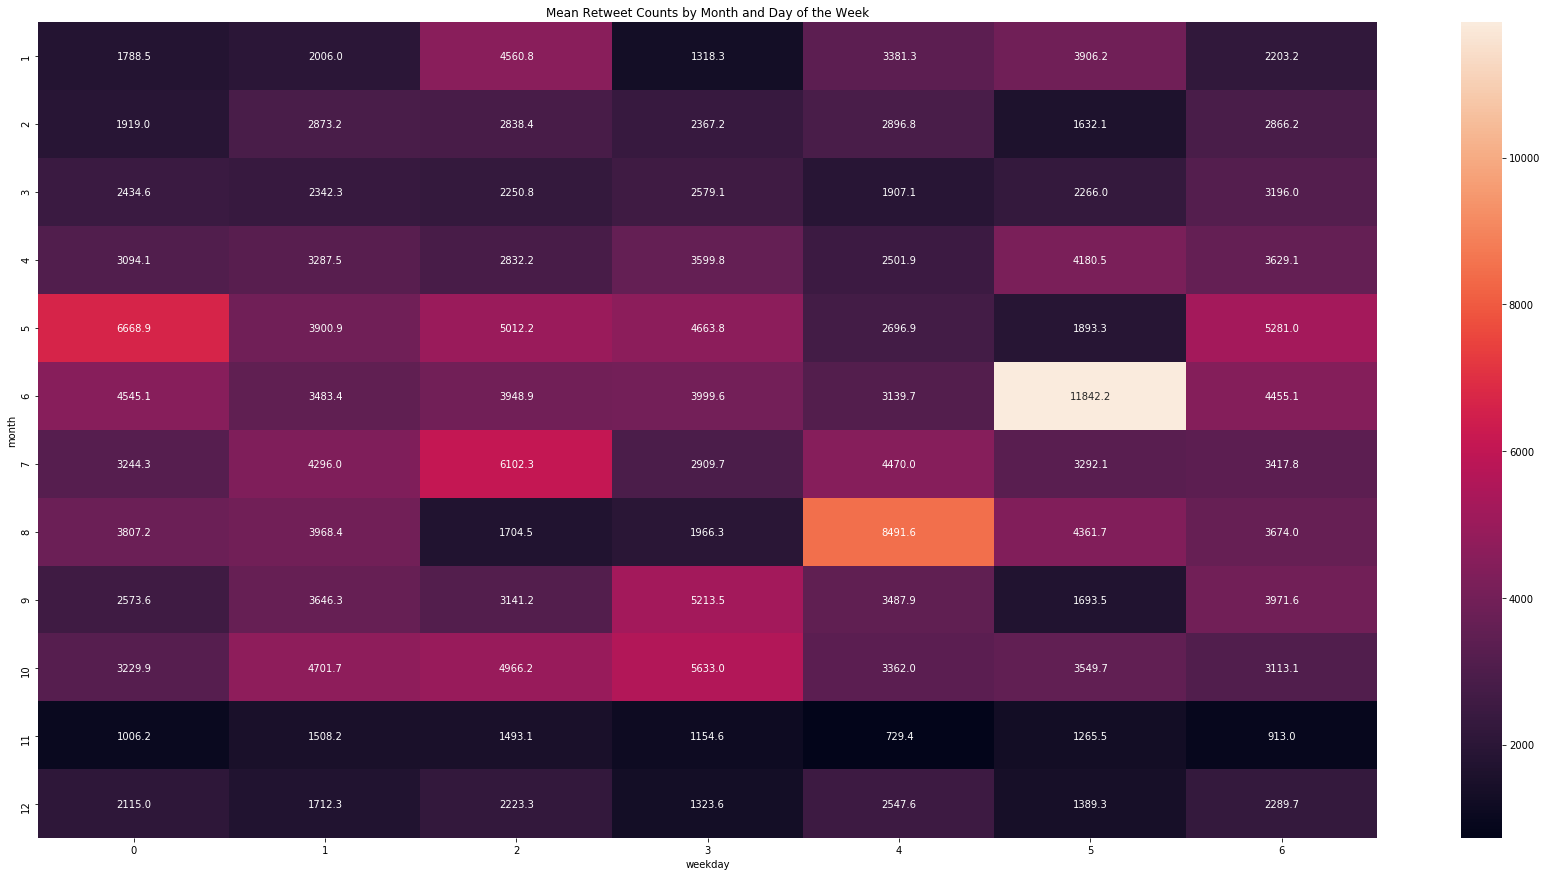

In [85]:
fig, ax = plt.subplots(figsize=(30,15))
ax.set_title('Mean Retweet Counts by Month and Day of the Week')
df5_hm = df5.pivot_table(index='month', columns='weekday', values='retweet_count', aggfunc=np.mean)
sns.heatmap(df5_hm, annot=True, fmt=".1f")
plt.show()

From the visualization, we see that Fridays in June are a popular day to retweet followed by Thursdays in August.  At the end of the year (Novembers and Decembers) retweet are consistently low no matter what day of the week it is.